In [1]:
import scipy as sp
import pylab as pl
import pandas as pd
import numpy as np

from scipy.interpolate import interp1d


In [96]:
sn = {}
excess = {'none':{}}
for f in ['g', 'r', 'i']:
    sn[f] = pd.read_csv("snIa" + f + ".csv")
    
    
maxt = max([sn[f].time[0] for f in ['g', 'r', 'i']])
print(maxt)

for f in ['g', 'r', 'i']:
        sn[f] = sn[f][sn[f].time >= maxt]
        sn[f + "int"] = interp1d(sn[f]["time"], sn[f]["mag"], 
                            bounds_error=False, fill_value=0)
        
for d in ["a5e11", "a2e12", "a2e13", 'none']:
    excess[d] = {}
    for f in ['g', 'r', 'i']:
        if  d is 'none':
            excess['none'][f] = {}
            excess['none'][f]["phase"] = np.arange(0, 10, 0.5)
            excess['none'][f]["12.8386"] = np.array([1] * 
                                    len(excess['none'][f]["phase"]))
        else:
            excess[d][f] = pd.read_csv(d + "_" + f + "_smoothed_baselineremoved.csv")
        excess[d][f + "int"] = interp1d(excess[d][f]["phase"] + maxt, 
                          excess[d][f]["12.8386"], bounds_error=False, fill_value=1.0)


-18.1


-18.1
-18.1
-18.1


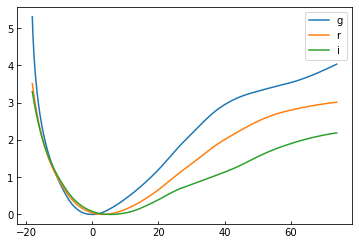

In [97]:
for f in ['g', 'r', 'i']:
    print(min(sn[f].time))
    pl.plot(sn[f]["time"], sn[f]["mag"], label=f)
    pl.legend()
pl.show()        

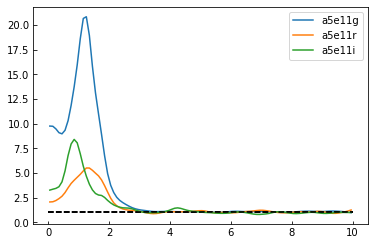

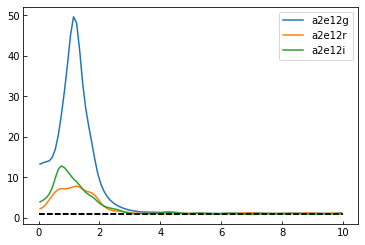

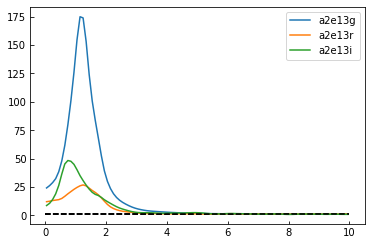

In [82]:
for d in ["a5e11", "a2e12", "a2e13"]:
    pl.figure()
    for f in ['g', 'r', 'i']:
        pl.plot(excess[d][f]["phase"], 
                          excess[d][f]["12.8386"], label=d+f)
        pl.plot([0,10], [1,1], 'k--')
    pl.legend()
pl.show()        

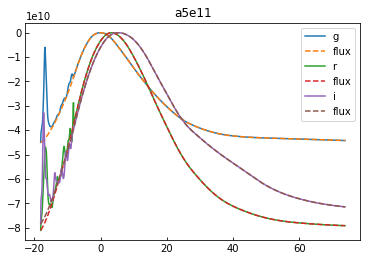

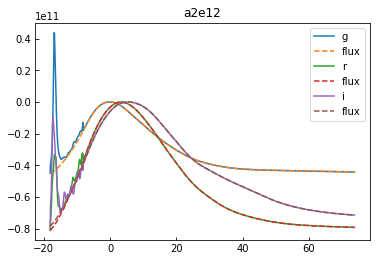

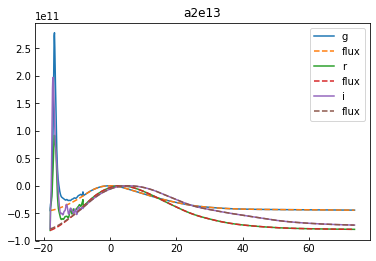

In [83]:
for d in ["a5e11", "a2e12", "a2e13"]:
    pl.figure()
    pl.title(d)
    for f in ['g', 'r', 'i']:
        pl.plot(sn[f].time, ((sn[f].flux) * 
                                 excess[d][f+"int"](sn[f].time)) - 
               (sn[f][sn[f].flux == sn[f].flux.max()].flux.values), label=f)
        pl.plot(sn[f].time, ((sn[f].flux)) - 
               (sn[f][sn[f].flux == sn[f].flux.max()].flux.values),  '--')
        pl.legend()
    
pl.show()

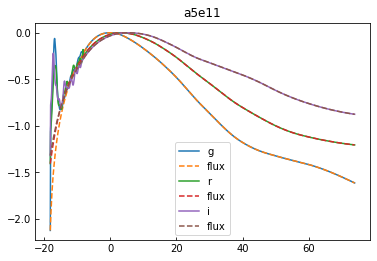

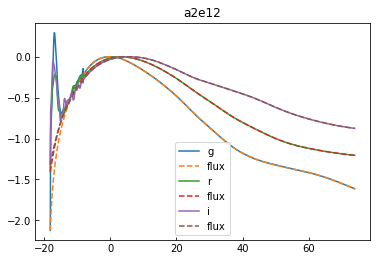

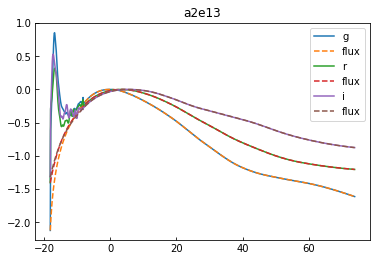

In [84]:
for d in ["a5e11", "a2e12", "a2e13"]:
    pl.figure()
    pl.title(d)
    for f in ['g', 'r', 'i']:
        pl.plot(sn[f].time, np.log10((sn[f].flux) * 
                                 excess[d][f+"int"](sn[f].time)) - 
               np.log10(sn[f][sn[f].flux == sn[f].flux.max()].flux.values), label=f)
        pl.plot(sn[f].time, np.log10((sn[f].flux)) - 
               np.log10(sn[f][sn[f].flux == sn[f].flux.max()].flux.values),  '--')
        pl.legend()
    
pl.show()

In [99]:
allsnIa = {}
names = {"a5e11":'Ia_2MsMS', "a2e12":"Ia_6MsMS", "a2e13":"Ia_1MsRG", 'none':"Ia"}
for d in ["a5e11", "a2e12", "a2e13", 'none']:
    allsnIa[d] = {}
    for f in ['r','g','i']:
        allsnIa[d][f] = pd.DataFrame({"trel" : sn[f].time, "normmag": -(np.log10((sn[f].flux) * 
                                 excess[d][f+"int"](sn[f].time)) - 
                                   np.log10(sn[f][sn[f].time==0].flux.values))})
                         
        allsnIa[d][f]["SN"] = [names[d]]*len(allsnIa[d][f])
        allsnIa[d][f]["band"] = [f]*len(allsnIa[d][f])
    

In [100]:
allsnIa[d]['i'].head()

,normmag,trel,SN,band
58,1.285906,-18.1,Ia,i
59,1.264046,-18.0,Ia,i
60,1.242520,-17.9,Ia,i
61,1.221341,-17.8,Ia,i
62,1.200564,-17.7,Ia,i


In [101]:
pd.read_csv("snIa" + f + ".csv").head()

,time,band,flux,fluxerr,zp,zpsys,mag
0,-23.9,desi,2.349428e+07,4850.634495,50.0,ab,8.863399
1,-23.8,desi,3.524674e+07,5939.426109,50.0,ab,8.423007
2,-23.7,desi,4.699873e+07,6857.471108,50.0,ab,8.110589
3,-23.6,desi,5.875178e+07,7666.357512,50.0,ab,7.868252
4,-23.5,desi,7.047348e+07,8397.688075,50.0,ab,7.670740


In [113]:
tmp = pd.concat([pd.read_csv("../outputs/allfast.csv")] + \
[allsnIa[d][f] for f in ['g','r','i'] 
 for d in ["a5e11", "a2e12", "a2e13", 'none']])#.to_csv("../outputs/allfast_wIa.csv", 
                                                #       index=False)
tmp.to_csv("../outputs/allfast_wIa.csv", index=False)

tmp.groupby(["SN", "band"]).count() 

absmag  error   jd  mag  normmag  survey  trel
SN             band                                                
GW170817       g          0     53   64   64       64      57    64
               i          0     72   82   82       82      71    82
               r          0     88  167  167      167     157   167
               u          0      3    3    3        3       0     3
               z          0     53   58   58       58      48    58
Ia             g          0      0    0    0      920       0   920
               i          0      0    0    0      920       0   920
               r          0      0    0    0      920       0   920
Ia_1MsRG       g          0      0    0    0      920       0   920
               i          0      0    0    0      920       0   920
               r          0      0    0    0      920       0   920
Ia_2MsMS       g          0      0    0    0      920       0   920
               i          0      0    0    0      920       0   920
               r          0      0    0    0      920       0   920
Ia_6MsMS       g          0      0    0    0      920       0   920
               i          0      0    0    0      920       0   920
               r          0      0    0    0      920       0   920
PS1-10ah       g         18      3   18   18       18      18    18
               i         12      5   12   12       12      12    12
               r         15      6   15   15       15      15    15
               z         10      5   10   10       10      10    10
PS1-10bjp      g         16      6   16   16       16      16    16
               i         14      9   14   14       14      14    14
               r         13      5   13   13       13      13    13
               z         16      6   16   16       16      16    16
PS1-10iu       g          0      6   14   14       14      14    14
               i          0      3    9    9        9       9     9
               r          0      6   13   13       13      13    13
               z          0      5   12   12       12      12    12
PS1-11bbq      g          7      1    7    7        7       7     7
...                     ...    ...  ...  ...      ...     ...   ...
PS1-12bv       g         10      4   10   10       10      10    10
               i         13      6   13   13       13      13    13
               r          9      2    9    9        9       9     9
               z         17      7   17   17       17      17    17
PS1-13aea      g          0      2    9    9        9       9     9
               i          0      6   12   12       12      12    12
               r          0      6   10   10       10      10    10
               z          0      4   13   13       13      13    13
PS1-13bit      g          0      4    7    7        7       7     7
               i          0      6   13   13       13      13    13
               r          0      4    7    7        7       7     7
               z          0      1    8    8        8       8     8
PS1-13cgt      g          0      3    8    8        8       8     8
               i          0      6   13   13       13      13    13
               z          0      7   13   13       13      13    13
PS1-13duy      g          2      2    2    2        2       2     2
               i          6      3    6    6        6       6     6
               r          6      2    6    6        6       6     6
               z          8      3    8    8        8       8     8
PS1-13ess      g          8      3    8    8        8       8     8
               i          6      2    6    6        6       6     6
               r         11      5   11   11       11      11    11
               z          8      3    8    8        8       8     8
PTF09uj.json   g          0      2    2    2        2       0     2
               i          0      2    2    2        2       0     2
               r          0      3    3    3        3       0     3
iPTF16asu

In [103]:
tmp.groupby("SN").count()

,absmag,band,error,jd,mag,normmag,survey,trel
SN,,,,,,,,
GW170817,0,374,269,374,374,374,333,374
Ia,0,2760,0,0,0,2760,0,2760
Ia_1MsRG,0,2760,0,0,0,2760,0,2760
Ia_2MsMS,0,2760,0,0,0,2760,0,2760
Ia_6MsMS,0,2760,0,0,0,2760,0,2760
PS1-10ah,55,55,19,55,55,55,55,55
PS1-10bjp,59,59,26,59,59,59,59,59
PS1-10iu,0,48,20,48,48,48,48,48
PS1-11bbq,42,42,9,42,42,42,42,42


//anaconda/envs/GEOP/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


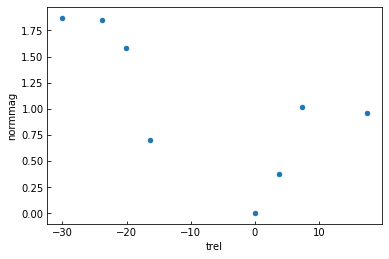

In [104]:
pd.read_csv("../outputs/allfast.csv")[
    (pd.read_csv("../outputs/allfast.csv")["SN"] == "PS1-13ess")*
(pd.read_csv("../outputs/allfast.csv")["band"] == "g")].plot(x="trel", 
                                                                     y="normmag", 
                                                                     kind='scatter')

(2.2307486131707663, -0.14010148235041742)

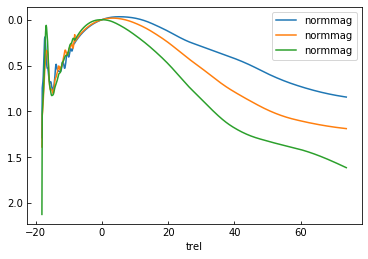

In [105]:
d = "a5e11"
f = "i"
ax = allsnIa[d][f].plot(x="trel", y="normmag")
d = "a5e11"
f = "r"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
d = "a5e11"
f = "g"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

(2.2437999845510888, -0.4141802813371901)

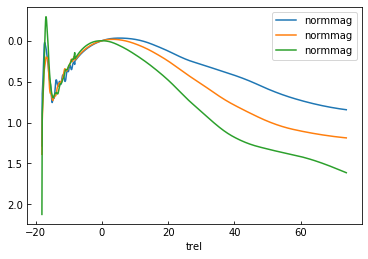

In [106]:
d = "a2e12"
f = "i"
ax = allsnIa[d][f].plot(x="trel", y="normmag")
d = "a2e12"
f = "r"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
d = "a2e12"
f = "g"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

(2.27181071325481, -1.0024055841153405)

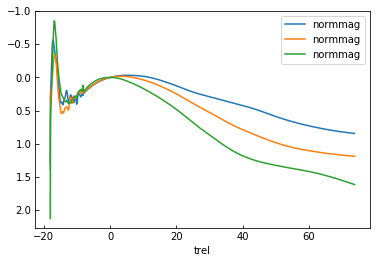

In [107]:
d = "a2e13"
f = "i"
ax = allsnIa[d][f].plot(x="trel", y="normmag")
d = "a2e13"
f = "r"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
d = "a2e13"
f = "g"
allsnIa[d][f].plot(x="trel", y="normmag", ax=ax)
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])

In [108]:
#["Ia" in t for t in tmp["SN"].values]
#[ t for t in tmp["SN"]]
tmp.groupby("SN").count()

,absmag,band,error,jd,mag,normmag,survey,trel
SN,,,,,,,,
GW170817,0,374,269,374,374,374,333,374
Ia,0,2760,0,0,0,2760,0,2760
Ia_1MsRG,0,2760,0,0,0,2760,0,2760
Ia_2MsMS,0,2760,0,0,0,2760,0,2760
Ia_6MsMS,0,2760,0,0,0,2760,0,2760
PS1-10ah,55,55,19,55,55,55,55,55
PS1-10bjp,59,59,26,59,59,59,59,59
PS1-10iu,0,48,20,48,48,48,48,48
PS1-11bbq,42,42,9,42,42,42,42,42


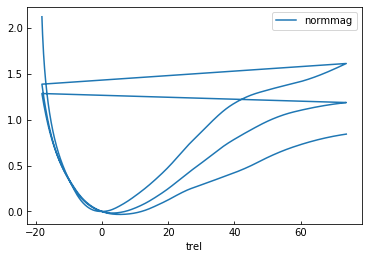

In [109]:
#tmp = pd.read_csv("../outputs/allfast_wIa.csv")
tmp["Ia" == tmp["SN"]].plot(x="trel", 
        y="normmag")

In [110]:
tmp["Ia" == tmp["SN"]]

,SN,absmag,band,error,jd,mag,normmag,survey,trel
0,Ia,NaN,g,NaN,NaN,NaN,2.122983,NaN,-18.1
1,Ia,NaN,g,NaN,NaN,NaN,2.017673,NaN,-18.0
2,Ia,NaN,g,NaN,NaN,NaN,1.927881,NaN,-17.9
3,Ia,NaN,g,NaN,NaN,NaN,1.849404,NaN,-17.8
4,Ia,NaN,g,NaN,NaN,NaN,1.779712,NaN,-17.7
5,Ia,NaN,g,NaN,NaN,NaN,1.716965,NaN,-17.6
6,Ia,NaN,g,NaN,NaN,NaN,1.659840,NaN,-17.5
7,Ia,NaN,g,NaN,NaN,NaN,1.607521,NaN,-17.4
8,Ia,NaN,g,NaN,NaN,NaN,1.559262,NaN,-17.3
9,Ia,NaN,g,NaN,NaN,NaN,1.514484,NaN,-17.2


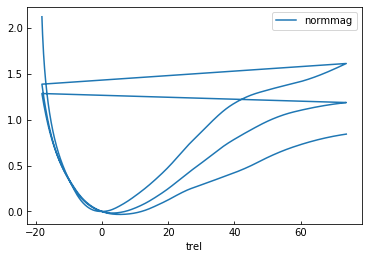

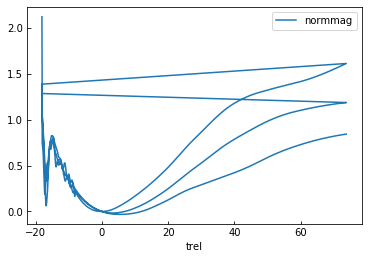

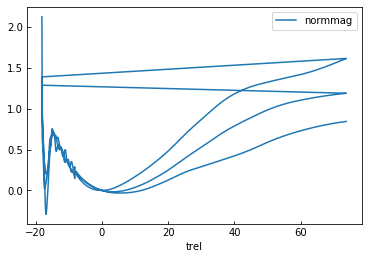

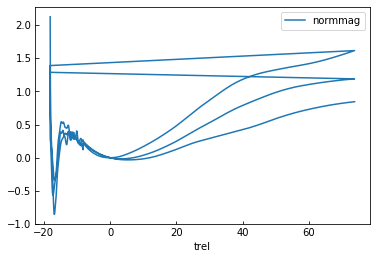

In [112]:
tmp["Ia" == tmp["SN"]].plot(x="trel", 
        y="normmag")
tmp["Ia_2MsMS" == tmp["SN"]].plot(x="trel", 
        y="normmag")
tmp["Ia_6MsMS" == tmp["SN"]].plot(x="trel", 
        y="normmag")
tmp["Ia_1MsRG" == tmp["SN"]].plot(x="trel", 
        y="normmag")